In [13]:
import numpy as np
import networkx as nx
import networkx.algorithms.approximation.clique as nxclique
from math import log10
import pylab as plt


class CliqueSeparator:
    def __init__(self, graph):
        self.graph = graph  # networkx graph
        self.graph_filled = graph.copy()
        self.n = graph.number_of_nodes()
        self.l = [1] * self.n  # associated vertex number
        self.alpha = [-1] * self.n
        self.k = 1
        self.atoms = []
        self.unnumbered = list(range(self.n))  # set of vertex names which hasn't number yet

    def lexM(self):
        for i in range(self.n - 1, -1, -1):
            reached = [True] * self.n
            reach = [[] for y in range(self.k + 1)]  # np.empty((self.k+1, ))
            u = -1
            for j in self.unnumbered:
                if self.l[j] == self.k and u == -1:
                    u = j
                else:
                    reached[j] = False
            if u == -1:
                return
            self.alpha[u] = i
            self.unnumbered.remove(u)
            self.l[u] = -1  # we don't need l-value of numbered vertex
            for w in [w for w in self.graph_filled.neighbors(u) if self.alpha[w] == -1]:
                reach[self.l[w]].append(w)
                reached[w] = True
                self.l[w] += 0.5
            self.search(reach, reached, u)
            self.sort()
        print(self.alpha)
        return sorted(range(self.n), key=lambda x: self.alpha[x])  # returns minimal ordering of vertexes

    def search(self, reach, reached, u):
        for j in range(1, self.k + 1):
            while len(reach[j]) != 0:
                w = reach[j].pop(0)
                for z in [z for z in self.graph_filled.neighbors(w) if reached[z] is False]:
                    reached[z] = True
                    if self.l[z] > j:
                        reach[self.l[z]].append(z)
                        self.l[z] += 0.5
                        self.graph_filled.add_edge(u, z, color='b')
                    else:
                        reach[j].append(z)

    def sort(self):
        k_values = sorted(set(l_val for l_val in self.l if l_val != -1))
        self.k = len(k_values)
        for index, value in enumerate(self.l, 0):
            if value != -1:
                self.l[index] = k_values.index(value) + 1
        self.unnumbered = sorted(self.unnumbered, key=lambda x: self.l[x])

    def separate(self, ordered, graph_filled):
        for u in ordered:
            c = [w for w in graph_filled.neighbors(u) if self.alpha[u] < self.alpha[w]]
            if self.is_clique_in_G(c):
                B_and_C = [v for v in ordered if v != u and (v in c or v not in graph_filled.neighbors(u))]
                if len(B_and_C) > len(c):
                    A = [v for v in ordered if v not in B_and_C]
                    atom = self.graph.copy()
                    atom.remove_nodes_from([v for v in range(self.n) if v not in A and v not in c])
                    self.atoms.append(atom)
                    graph_filled_copy = graph_filled.copy()
                    graph_filled_copy.remove_nodes_from(A)
                    nx.draw(graph_filled_copy, with_labels=True, font_size = 30)
                    plt.show()
                    self.separate(B_and_C, graph_filled_copy)
                    return
        atom = self.graph.copy()
        atom.remove_nodes_from([v for v in range(self.n) if v not in graph_filled.nodes()])
        self.atoms.append(atom)

    def is_clique_in_G(self, vertexes):
        for i in range(len(vertexes)):
            for j in range(i + 1, len(vertexes)):
                if not self.graph.has_edge(vertexes[i], vertexes[j]):
                    return False
        return True

    def find_max_clique(self):
        self.separate(self.lexM(), self.graph_filled)
        current_max_clique_size = 1
        current_max_clique = []
        for atom in sorted(self.atoms, key=lambda x: len(x.nodes()), reverse=True):
            if len(atom.nodes()) <= current_max_clique_size:
                return current_max_clique
            clique = nxclique.max_clique(atom)
            if len(clique) > current_max_clique_size:
                current_max_clique = clique
                current_max_clique_size = len(clique)
        return current_max_clique


[10, 5, 9, 8, 3, 7, 1, 6, 4, 0, 2]


C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

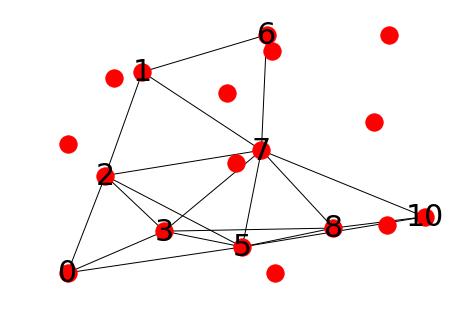

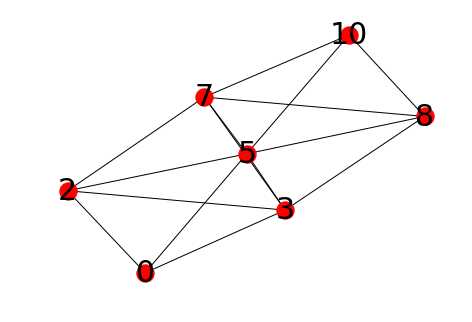

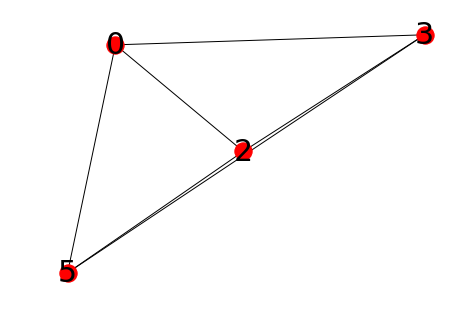

{0, 2, 3, 5}


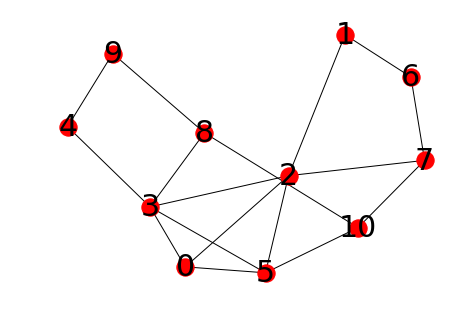

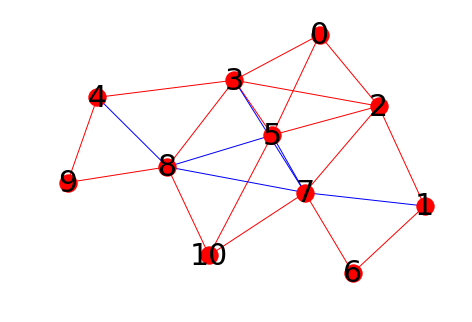

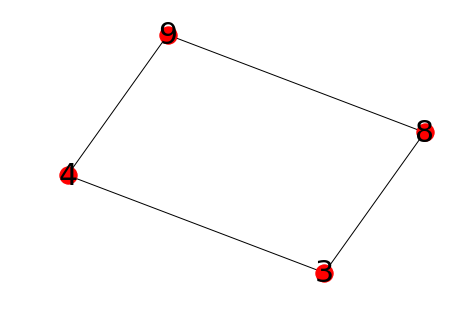

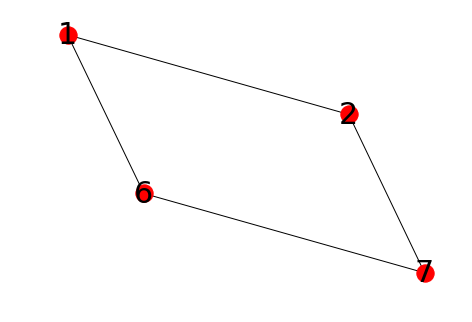

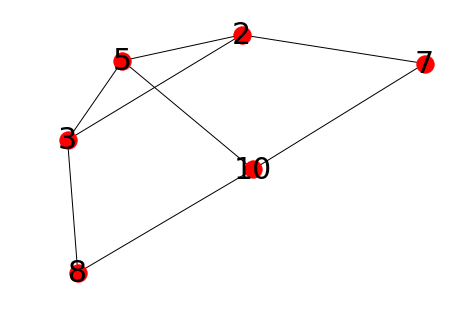

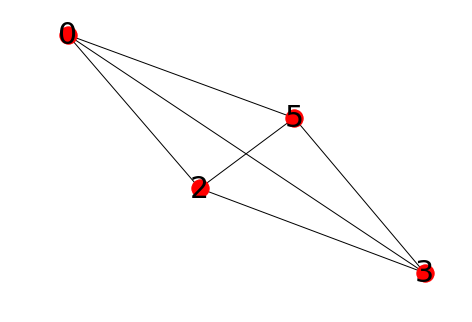

In [14]:
G = nx.Graph()
# edges = [(0, 1), (0, 2), (1, 2), (1, 4), (3, 5), (3, 6), (5, 6), (5, 8), (3, 7), (4, 7),
#         (7, 8), (6, 8), (1, 5), (1, 3)]
edges = [(0, 2), (0, 5), (0, 3), (1, 2), (1, 6), (2, 3), (2, 5), (2, 7), (3, 5), (3, 8), (3, 4), (4, 9), (5, 10),
         (6, 7), (7, 10), (8, 9), (8, 10)]
G.add_edges_from(edges, color='r')
clique_separator = CliqueSeparator(G)
    # clique_separator.separate(clique_separator.lexM(), clique_separator.graph_filled)
    # print(clique_separator.possible_cliques)
print(clique_separator.find_max_clique())
nx.draw(clique_separator.graph, with_labels=True,font_size = 30)
plt.show()
edgess = clique_separator.graph_filled.edges()
colors = [clique_separator.graph_filled[u][v]['color'] for u,v in edgess]

nx.draw(clique_separator.graph_filled, with_labels=True, edge_color = colors, font_size = 30)
plt.show()

for graph in clique_separator.atoms:
    nx.draw(graph, with_labels=True, font_size = 30)
    plt.show()

In [15]:
import numpy as np
import networkx as nx
import networkx.algorithms.approximation.clique as nxclique
from math import log10


class CliqueSeparator:
    def __init__(self, graph):
        self.graph = graph  # networkx graph
        self.graph_filled = graph.copy()
        self.n = graph.number_of_nodes()
        self.l = [1] * self.n  # associated vertex number
        self.alpha = [-1] * self.n
        self.k = 1
        self.atoms = []
        self.separated = []
        self.unnumbered = list(range(self.n))  # set of vertex names which hasn't number yet

    def lexM(self):
        for i in range(self.n - 1, -1, -1):
            reached = [True] * self.n
            reach = [[] for y in range(self.k + 1)]  # np.empty((self.k+1, ))
            u = -1
            for j in self.unnumbered:
                if self.l[j] == self.k and u == -1:
                    u = j
                else:
                    reached[j] = False
            if u == -1:
                return
            self.alpha[u] = i
            self.unnumbered.remove(u)
            self.l[u] = -1  # we don't need l-value of numbered vertex
            for w in [w for w in self.graph_filled.neighbors(u) if self.alpha[w] == -1]:
                reach[self.l[w]].append(w)
                reached[w] = True
                self.l[w] += 0.5
            self.search(reach, reached, u)
            self.sort()
        print(self.alpha)
        return sorted(range(self.n), key=lambda x: self.alpha[x])  # returns minimal ordering of vertexes

    def search(self, reach, reached, u):
        for j in range(1, self.k + 1):
            while len(reach[j]) != 0:
                w = reach[j].pop(0)
                for z in [z for z in self.graph_filled.neighbors(w) if reached[z] is False]:
                    reached[z] = True
                    if self.l[z] > j:
                        reach[self.l[z]].append(z)
                        self.l[z] += 0.5
                        self.graph_filled.add_edge(u, z)
                    else:
                        reach[j].append(z)

    def sort(self):
        k_values = sorted(set(l_val for l_val in self.l if l_val != -1))
        self.k = len(k_values)
        for index, value in enumerate(self.l, 0):
            if value != -1:
                self.l[index] = k_values.index(value) + 1
        self.unnumbered = sorted(self.unnumbered, key=lambda x: self.l[x])

    def separate(self, ordered, graph_filled):
        for u in ordered:
            c = [w for w in graph_filled.neighbors(u) if self.alpha[u] < self.alpha[w]]
            if self.is_clique_in_G(c):
                B_and_C = [v for v in ordered if v != u and (v in c or v not in graph_filled.neighbors(u))]
                if len(B_and_C) > len(c):
                    A = [v for v in ordered if v not in B_and_C]
                    atom = self.graph.copy()
                    atom.remove_nodes_from([v for v in range(self.n) if v not in A and v not in c])
                    self.atoms.append(atom)
                    bc_graph = self.graph.copy()
                    bc_graph.remove_nodes_from([v for v in range(self.n) if v not in B_and_C])
                    graph_filled_copy = graph_filled.copy()
                    graph_filled_copy.remove_nodes_from(A)

                    self.separated.append([atom, bc_graph, c])
                    self.separate(B_and_C, graph_filled_copy)
                    return
        atom = self.graph.copy()
        atom.remove_nodes_from([v for v in range(self.n) if v not in graph_filled.nodes()])
        self.atoms.append(atom)

    def is_clique_in_G(self, vertexes):
        for i in range(len(vertexes)):
            for j in range(i + 1, len(vertexes)):
                if not self.graph.has_edge(vertexes[i], vertexes[j]):
                    return False
        return True

    def find_max_clique(self):
        self.separate(self.lexM(), self.graph_filled)
        current_max_clique_size = 1
        current_max_clique = []
        for atom in sorted(self.atoms, key=lambda x: len(x.nodes()), reverse=True):
            if len(atom.nodes()) <= current_max_clique_size:
                return current_max_clique
            clique = nxclique.max_clique(atom)
            if len(clique) > current_max_clique_size:
                current_max_clique = clique
                current_max_clique_size = len(clique)
        return current_max_clique

    def min_coloring(self):
        colors = None
        for values in reversed(self.separated):
            colors = self.merge_colors(values[0], values[1], values[2], colors)
        return colors

    def merge_colors(self, ac, bc, c, bc_colors):
        ac_colors = nx.coloring.greedy_color(ac, strategy=nx.coloring.strategy_largest_first)
        if bc_colors is None:
            bc_colors = nx.coloring.greedy_color(bc, strategy=nx.coloring.strategy_largest_first)

        c_in_a_colors = {vertex: ac_colors[vertex] for vertex in c}
        c_in_b_colors = {vertex: bc_colors[vertex] for vertex in c}
        if len(set(ac_colors.values())) < len(set(bc_colors.values())):
            ac_colors,bc_colors = bc_colors, ac_colors
        colors_to_be_replaced = {c_in_a_color: c_in_b_colors[key] for key, c_in_a_color in c_in_a_colors.items()}

        for vertex, color in bc_colors.items():
            if color in colors_to_be_replaced:
                bc_colors[vertex] = colors_to_be_replaced[color]
        bc_colors.update(ac_colors)
        return bc_colors

In [16]:
G = nx.Graph()
# edges = [(0, 1), (0, 2), (1, 2), (1, 4), (3, 5), (3, 6), (5, 6), (5, 8), (3, 7), (4, 7),
#         (7, 8), (6, 8), (1, 5), (1, 3)]
edges = [(0, 2), (0, 5), (0, 3), (1, 2), (1, 6), (2, 3), (2, 5), (2, 7), (3, 5), (3, 8), (3, 4), (4, 9), (5, 10),
             (6, 7), (7, 10), (8, 9), (8, 10)]
G.add_edges_from(edges)
clique_separator = CliqueSeparator(G)
clique_separator.separate(clique_separator.lexM(), clique_separator.graph_filled)
#print(clique_separator.possible_cliques)
print(clique_separator.min_coloring())
#print(clique_separator.find_max_clique())


[10, 5, 9, 8, 3, 7, 1, 6, 4, 0, 2]
{3: 3, 8: 2, 4: 2, 9: 3, 2: 1, 1: 2, 6: 1, 7: 2, 5: 2, 10: 1, 0: 0}


[10, 5, 9, 8, 3, 7, 1, 6, 4, 0, 2]
{3: 3, 8: 2, 4: 2, 9: 3, 2: 1, 1: 2, 6: 1, 7: 2, 5: 2, 10: 1, 0: 0}
[0, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1]
3


C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

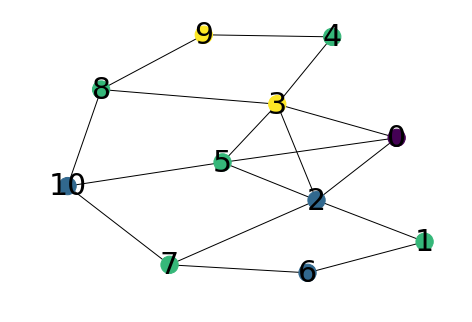

In [39]:
G = nx.Graph()
# edges = [(0, 1), (0, 2), (1, 2), (1, 4), (3, 5), (3, 6), (5, 6), (5, 8), (3, 7), (4, 7),
#         (7, 8), (6, 8), (1, 5), (1, 3)]
edges = [(0, 2), (0, 5), (0, 3), (1, 2), (1, 6), (2, 3), (2, 5), (2, 7), (3, 5), (3, 8), (3, 4), (4, 9), (5, 10),
             (6, 7), (7, 10), (8, 9), (8, 10)]
G.add_edges_from(edges)
clique_separator = CliqueSeparator(G)
clique_separator.separate(clique_separator.lexM(), clique_separator.graph_filled)
#print(clique_separator.possible_cliques)
min_coloring = clique_separator.min_coloring()
print(min_coloring)
print(vertexes_colors)
vertexes_colors = [min_coloring[i] for i in G.nodes()  ] 
print(min_coloring[3])
nx.draw(G, with_labels=True, nodes = list(range(G.number_of_nodes())), node_color = vertexes_colors, font_size = 30)
plt.show()

#print(clique_separator.find_max_clique())

[10, 5, 9, 8, 3, 7, 1, 6, 4, 0, 2]


C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Daniil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Daniil\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

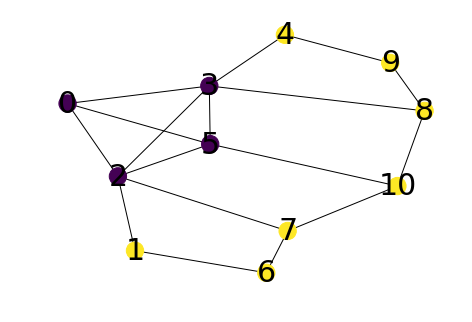

In [46]:
G = nx.Graph()
# edges = [(0, 1), (0, 2), (1, 2), (1, 4), (3, 5), (3, 6), (5, 6), (5, 8), (3, 7), (4, 7),
#         (7, 8), (6, 8), (1, 5), (1, 3)]
edges = [(0, 2), (0, 5), (0, 3), (1, 2), (1, 6), (2, 3), (2, 5), (2, 7), (3, 5), (3, 8), (3, 4), (4, 9), (5, 10),
             (6, 7), (7, 10), (8, 9), (8, 10)]
G.add_edges_from(edges)
clique_separator = CliqueSeparator(G)
#clique_separator.separate(clique_separator.lexM(), clique_separator.graph_filled)
#print(clique_separator.possible_cliques)
#print(clique_separator.find_max_clique())
clique = clique_separator.find_max_clique()
#min_coloring = clique_separator.min_coloring()
vertexes_colors = []
for i in G.nodes():
    if i in clique:
        vertexes_colors.append(0)
    else:
        vertexes_colors.append(1)
nx.draw(G, with_labels=True,node_color = vertexes_colors, font_size = 30)

plt.show()